# Accident Severity and Light Conditions

## Hypothesis

- Alternative Hypothesis (H₁): Accident severity is dependent on light conditions.
- Null Hypothesis (H₀): Accident severity is independent of light conditions.

## Rationale
Environmental factors, such as light conditions, can influence the severity of accidents. Poor visibility in low-light conditions (e.g., nighttime) may contribute to more serious accidents. By testing this hypothesis, we aim to determine if light conditions have a significant impact on the severity of accidents

> According to Plainis S, Murray IJ and Pallikaris IG, "injury severity is almost three times higher on roads with no lighting."[1]

## Data Analysis & Validation Approach
To explore this hypothesis, we will conduct an Exploratory Data Analysis (EDA).

This will involve:

- Creating a contingency table for Accident Severity vs. Light Conditions to examine how the two variables are related.
- Visualising the data using a bar plot to compare accident severity across different light conditions.

Following the EDA, we will use the Chi-square test of independence to statistically test whether there is a significant relationship between accident severity and light conditions.

- Chi-square test: This will help us determine if accident severity is independent of light conditions. If the p-value is less than 0.05, we will reject the null hypothesis and conclude that light conditions affect accident severity.


## Setting Correct Directories

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis'

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import textwrap

## Inspecting Variables

In [69]:
# load in the dataset
df = pd.read_csv('filtered_accident_data_set.csv')

print(df.shape, '\n')

# Check the variables for Accident_Severity and Light_Conditions
print(df['Accident_Severity'].value_counts(), '\n')
print(df['Light_Conditions'].value_counts())


(31494, 13) 

Accident_Severity
Slight     27575
Serious     3658
Fatal        261
Name: count, dtype: int64 

Light_Conditions
Daylight                       22892
Darkness - lights lit           8022
Darkness - no lighting           302
Darkness - lighting unknown      172
Darkness - lights unlit          106
Name: count, dtype: int64


## Visualisations

### Accident Count Across Light Conditions

The purpose of this visualisation is to get an overview of how accidents are distributed across light conditions. We hope to gain insight into the lightning conditions with the highest number of accidents and trends in category.

/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_26645/2130671530.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




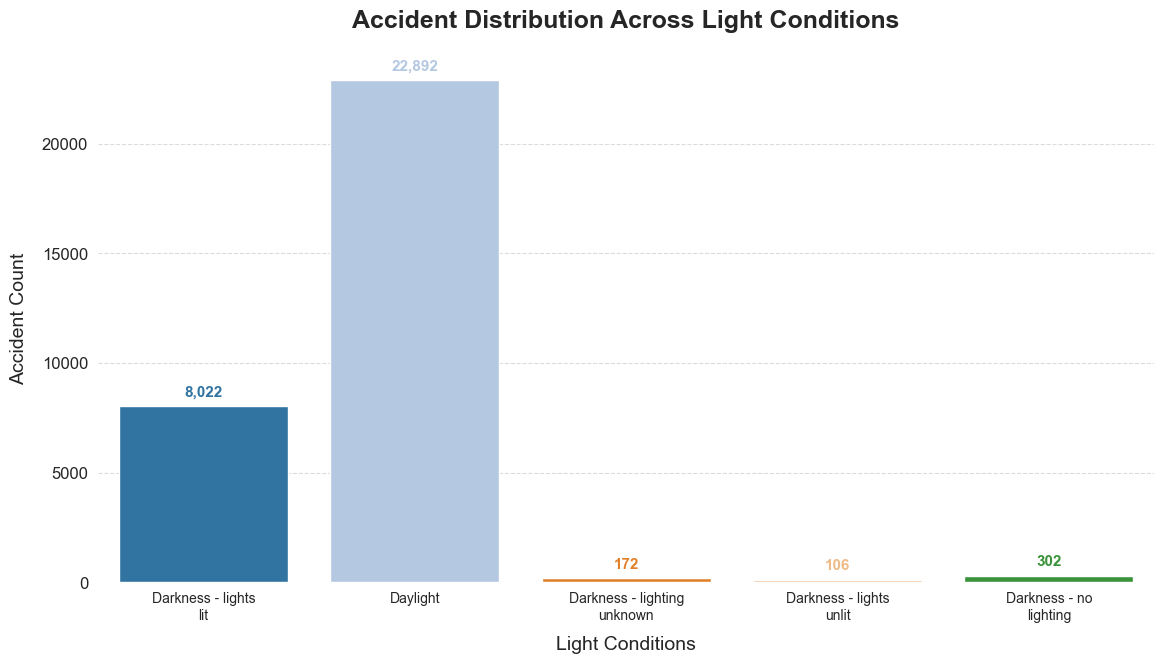

In [66]:
# Plotting the countplot
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df,
    x='Light_Conditions',
    palette='tab20'  # Assign different colors to each category
)

# Adding the title and labels with improved aesthetics
plt.title('Accident Distribution Across Light Conditions', fontsize=18, fontweight='bold', pad=20)

# Wrap x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in df['Light_Conditions'].unique()]

# Set ticks and tick labels
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels)
plt.xlabel('Light Conditions', fontsize=14, labelpad=10)
plt.ylabel('Accident Count', fontsize=14, labelpad=10)

# Increase font size for better readability
plt.yticks(fontsize=12)

# Add labels on each bar with matching color and improved formatting
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (0.01 * df['Accident_Severity'].count()),  # Dynamic offset based on total count
                f'{int(height):,}',  # Added comma for thousands separator
                ha='center', va='bottom',
                fontsize=11, fontweight='semibold',
                color=bar.get_facecolor()
            )

# Improve layout and add gridlines for better clarity
plt.tight_layout(pad=2.0)
sns.despine(left=True, bottom=True) #remove spines
plt.grid(axis='y', linestyle='--', alpha=0.7) #add horizontal gridlines
plt.show()

This countplot illustrates the distribution of road accidents across various lightning conditions. The X-axis shows the various categories of lightning, while the Y-axis shows the number of accidents recorded.

The highest amount of accidents occured under daylight conditions, followed by darkness with lights lit. In contrast, fewer accidents were recorded in darkness with unknown lightning, lights unlit and no lightning.

The daylight category accounts for ~73% of the total accidents within the dataset, almost 3x as prevalent as the darkness categories combined.

### Accident Severity Across Light Conditions

Colouring the previous visualisation by accident severity will provide insight into the relationship between the severity of an accident and the light condition.

/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_26645/645263140.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



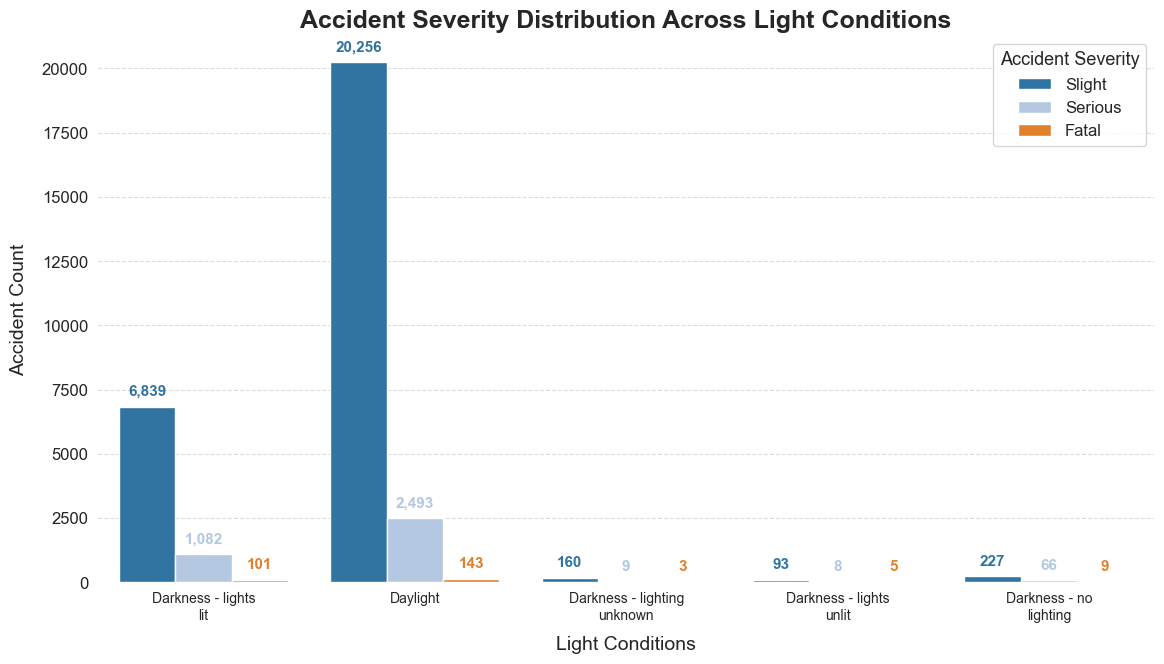

In [42]:
# load in the dataset
df = pd.read_csv('filtered_accident_data_set.csv')

# Plotting the countplot
plt.figure(figsize=(12, 7))  # Increased figure size for better readability
ax = sns.countplot(
    data=df,
    x='Light_Conditions',
    hue='Accident_Severity',
    palette='tab20'  # Changed palette for a more visually appealing color scheme
)

# Adding the title and labels with improved aesthetics
plt.title('Accident Severity Distribution Across Light Conditions', fontsize=18, fontweight='bold')

# Wrap x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in df['Light_Conditions'].unique()]
ax.set_xticklabels(wrapped_labels)

plt.xlabel('Light Conditions', fontsize=14, labelpad=10)
plt.ylabel('Accident Count', fontsize=14, labelpad=10)

# Increase font size for better readability
plt.yticks(fontsize=12)
plt.legend(title='Accident Severity', fontsize=12, title_fontsize='13')

# Add labels on each bar with matching color and improved formatting
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (0.01 * df['Accident_Severity'].count()),  # Dynamic offset based on total count
                f'{int(height):,}',  # Added comma for thousands separator
                ha='center', va='bottom',
                fontsize=11, fontweight='semibold',
                color=bar.get_facecolor()
            )

# Improve layout and add gridlines for better clarity
plt.tight_layout(pad=2.0)
sns.despine(left=True, bottom=True) #remove spines
plt.grid(axis='y', linestyle='--', alpha=0.7) #add horizontal gridlines
plt.show()

This chart illustrates the distribution of road accidents across various light conditions, with bars grouped by accident severity. The x-axis represents light conditions, and the y-axis shows the count of accidents, with separate bars for each severity level.

Distribution of accident severity across light conditions:
- For daylight, the majority of accidents are classified as `slight` (20,256). Following that, the `serious` (2493) severity showed a notable decrease in accident count, while `fatal` category exhibited an even smaller number of accidents (143).

- For darkness - lights lit, the majority of accidents are classified as `slight` (6839). Following that, the `serious` (1082) severity also showed a  decrease in accident count, while `fatal` category similarly had an even smaller number of accidents (101).

- This pattern was consistent across all the light conditions. `Slight` accidents were the most common, followed by `serious` accidents, and `fatal` accidents were the least frequent.

Total counts:
* Slight - 27575
* Serious - 3658
* Fatal - 261

## Contingency Table

Contingency tables display frequencies for combinations of categorical variables.

In [71]:
# Create contingency table
contingency_table = pd.crosstab(df['Light_Conditions'], df['Accident_Severity'])
print(contingency_table)

Accident_Severity            Fatal  Serious  Slight
Light_Conditions                                   
Darkness - lighting unknown      3        9     160
Darkness - lights lit          101     1082    6839
Darkness - lights unlit          5        8      93
Darkness - no lighting           9       66     227
Daylight                       143     2493   20256


In [79]:
# Compute row & column percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print('\nRow percentages:')
print(row_percentages)



Row percentages:
Accident_Severity               Fatal    Serious     Slight
Light_Conditions                                           
Darkness - lighting unknown  1.744186   5.232558  93.023256
Darkness - lights lit        1.259038  13.487908  85.253054
Darkness - lights unlit      4.716981   7.547170  87.735849
Darkness - no lighting       2.980132  21.854305  75.165563
Daylight                     0.624672  10.890267  88.485060


- Fatal accidents are most common in "Darkness - Lights Unlit" (4.72%), showing how dangerous unlit roads are.
- "Darkness - No Lighting" has the highest serious accident rate (21.85%), meaning completely unlit areas increase accident severity.
- Daylight is the safest condition, with the lowest fatal (0.62%) and serious (10.89%) accident rates.

<Axes: xlabel='Accident_Severity', ylabel='Light_Conditions'>

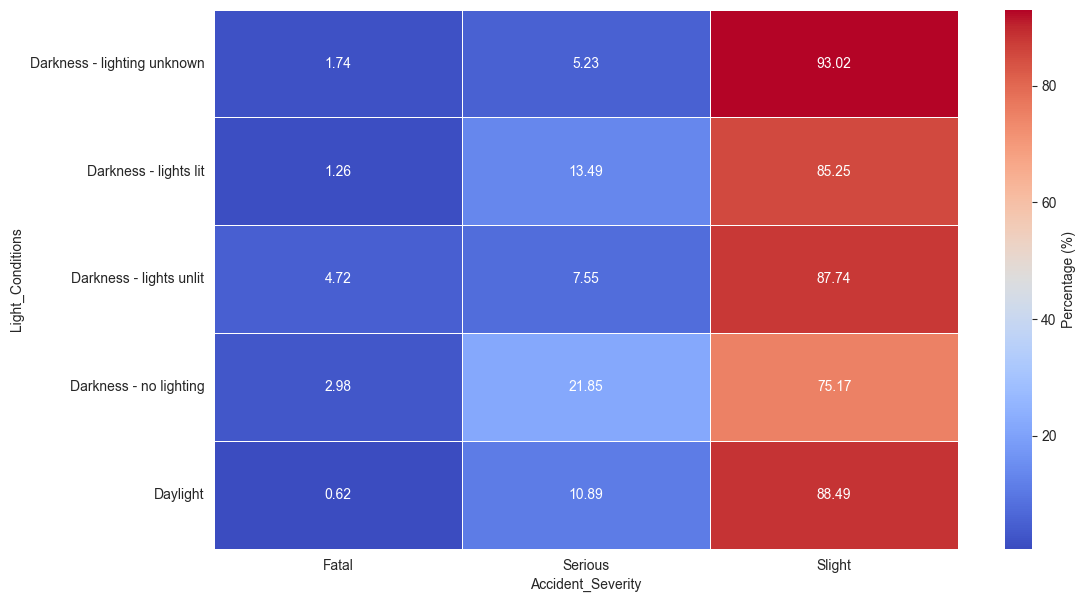

In [83]:
# Plotting the heatmap
plt.figure(figsize=(12, 7))

# Create the heatmap
sns.heatmap(
    row_percentages,
    annot=True,  # Show values in each cell
    fmt='.2f',  # Format the annotations to 2 decimal places
    cmap='coolwarm',  # Choose color palette
    cbar_kws={'label': 'Percentage (%)'},  # Label for color bar
    linewidths=0.5  # Add gridlines between cells
)

## Chi-Squared

The Chi-Square Test for Independence helps us determine if light conditions and accident severity are related or if their distribution is just random.

In [82]:
# Chi Squared Test

from scipy.stats import chi2_contingency

chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f'\nChi-Squared: {chi2}') # Chi-Squared value which is used to calculate the p-value
print(f'p-value: {p_val}') # p-value which indicates the significance level
print(f'Degrees of Freedom: {dof}') # Degrees of Freedom which is used to determine the critical value
print('\nExpected Frequencies Table:') # Expected frequencies based on the data
print(expected)

# Check if p-value is less than 0.05
if p_val < 0.05:
    print('\nReject the null hypothesis: There is a significant association between Light Conditions and Accident Severity.')
else:
    print('\nFail to reject the null hypothesis: There is no significant association between Light Conditions and Accident Severity.')


Chi-Squared: 0.0047548871327750195
p-value: 0.9999999999986714
Degrees of Freedom: 8

Expected Frequencies Table:
[[4.52598706e-05 6.34331826e-04 4.78176602e-03]
 [2.11089931e-03 2.95849413e-02 2.23019343e-01]
 [2.78927110e-05 3.90925428e-04 2.94690232e-03]
 [7.94679123e-05 1.11376867e-03 8.39589150e-03]
 [6.02377301e-03 8.44251405e-02 6.36419696e-01]]

Fail to reject the null hypothesis: There is no significant association between Light Conditions and Accident Severity.


The findings from the Chi-square test suggest that accident severity does not significantly vary based on light conditions, meaning that light conditions, in isolation, do not appear to influence the severity of accidents. However, this result may be influenced by other confounding factors not accounted for in this hypothesis testing, such as road type, vehicle speed, or weather conditions. These factors could have a much stronger correlation with accident severity.

Given the lack of a significant association between light conditions and accident severity, stakeholders, such as local governments, should consider focusing efforts on variables that have a clearer, more direct impact on accident severity. For example, improvements in road infrastructure, better enforcement of speed limits, and addressing weather-related driving hazards might have a more substantial impact on reducing the severity of accidents

## Reference
* [1] Plainis S, Murray IJ, Pallikaris IG. Road traffic casualties: understanding the night-time death toll. Inj Prev. 2006 Apr;12(2):125-8. doi: 10.1136/ip.2005.011056. PMID: 16595429; PMCID: PMC2564438.

‌